# UBC Scientific Software Seminar

## August 24, 2016

Today's Agenda:

A basic machine learning example:

* Digits dataset
* Our own *k*-nearest neighbors classifier
* Evaluating the classifier
* Implementing `sklearn.neighbors.KNeighborsClassifier`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Digits dataset

The [scikit-learn](http://scikit-learn.org/) package comes equipped with some toy [datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) to explore and, in this notebook, we'll look at the [digits dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). We import the `datasets` module and use the `load_digits` function to load the digits dataset. We can use `datasets.load_digits?` to consult the documentation to see what is returned.

In [2]:
from sklearn import datasets

In [3]:
datasets.load_digits?

According to the documentation, the `load_digits` function returns a dictionary-like object which packages together several NumPy arrays and a description. To see what's available in the object, we can use the `.keys()` method:

In [4]:
digits = datasets.load_digits()

In [5]:
digits.keys()

dict_keys(['DESCR', 'target', 'target_names', 'data', 'images'])

In [6]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Let's look at the various arrays in the digits object. First, the **data array** is a 2D array where each row is a sample corresponding to a hand-written digit. We see that there are 1797 samples in the dataset each consisting of a 1D array of length 64 (representing an 8 by 8 pixel image).

In [7]:
type(digits.data)

numpy.ndarray

In [8]:
digits.data.shape

(1797, 64)

In [9]:
digits.data[0,:]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

The **target array** contains the label for each sample in data. We can see that the first sample is the digit 0.

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.target[0]

0

The **images array** is a 3D array which contains the same data as the data array but each sample is reshaped into a 8 by 8 array representing an 8 by 8 pixel image. In other words, the image array is simply a convenience so that we don't have to reshape the samples in the data array when we want to view the image.

In [12]:
digits.images.shape

(1797, 8, 8)

In [13]:
digits.images[0,:,:]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [14]:
digits.data[0,:].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

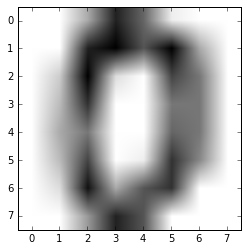

In [15]:
plt.imshow(digits.images[0,:,:],cmap='binary')

The **target_names array** is simply the complete list of labels for the samples:

In [16]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Exercise.** Plot a 4 by 4 grid of randomly selected images from the dataset to get a sense of what the digits look like:

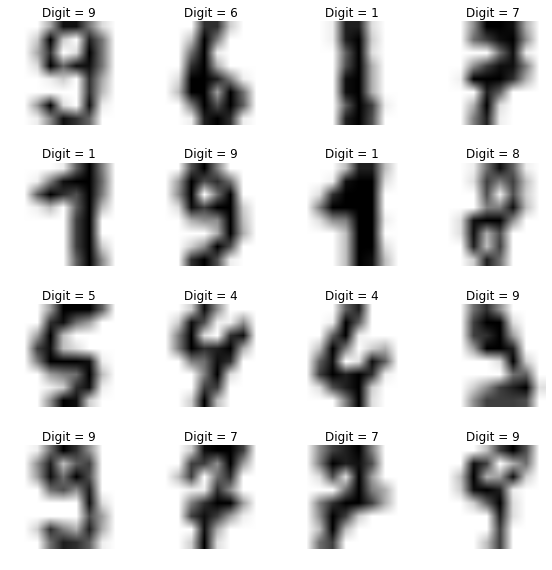

In [17]:
indices = np.random.randint(0,1797,16) # Create an array of 16 random integers chosen from the interval [0,1797]

plt.figure(figsize=(8,8))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(digits.images[indices[i]],cmap='binary')
    plt.title('Digit = {}'.format(digits.target[indices[i]]))
    plt.axis('off')

plt.tight_layout()

### Split the dataset into a training set and a testing set

It's very important **not** to use the same data for constructing *and* testing your models for obvious reasons. It's [standard practice](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) to split your dataset into a training set and a testing set.

In [18]:
# N is arbitrarily chosen to be the size of the training dataset
# (it may be better to take random sample of the dataset instead of the first N samples)
N = 1200

data_train = digits.data[:N,:]
target_train = digits.target[:N]

data_test = digits.data[N:,:]
target_test = digits.target[N:]

### Building our own *k*-nearest neighbors classifier

[Nearest neighbors](http://scikit-learn.org/stable/modules/neighbors.html) refers to a family of classification and regression algorithms based on a simple principle: "find a predefined number of training samples closest in distance to the new point, and predict the label from these".

Since the idea is simple enough, let's build our own classifier before we begin using sklearn implementations.

#### Attempt 1: Build the classifier as a function

Write a function which takes the following parameters:

* `sample` - array of length 64 with values in the interval [0,16] (represnting an 8 by 8 pixel image of a digit)
* `data` - array of samples of digits (as a 2D array of size (n samples) by 64)
* `target` - array of labels for the samples in data
* `k` - number of nearest neighbors to find

In [19]:
def knn_predict(sample,data,target,k=1,output=False):
    '''Predict digit label of sample using KNN with training samples in data with labels target.'''
    
    distances = np.linalg.norm(sample - data, axis=1)
    sorted_distances = np.sort(distances)
    threshold = sorted_distances[k - 1]
    neighbors = target[distances <= threshold]
    prediction = np.bincount(neighbors).argmax()
    
    if output:
        plt.imshow(sample.reshape(8,8),cmap='binary')
        plt.title('Sample Image')
        plt.axis('off')
        plt.show()

        print(k,'nearest neighbors are:',neighbors)

        print('\nKNN predicts:',prediction)
    
    return prediction

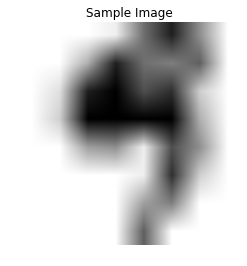

7 nearest neighbors are: [9 9 9 9 9 9 9]

KNN predicts: 9

Digit is: 9


In [20]:
i = np.random.randint(0,len(data_test)) # Choose a random index in the test data
knn_predict(data_test[i,:],data_train,target_train,k=7,output=True)
print('\nDigit is:',target_test[i])

#### Attempt 2: Build the classifier as an object

Write a class which produces objects with:

Attributes:

* `data` - array of training samples of digits (as a 2D array of size (n samples) by 64)
* `target` - array of training labels for the samples in data
* `k` - number of neighbors in KNN algorithm

Methods:

* `__init__` - instantiates an object
* `fit` - creates a model ready for prediction
* `predict` - takes an sample (as an array of length 64) and predicts the digit based on the KNN model
* `score` - takes arrays of images and labels and returns the accuracy of the model

In [21]:
class KNN():
    
    def __init__(self,k=10):
        self.k = k
        print('Creating KNN classifier object with k = {} ...'.format(self.k))
    
    def fit(self,data_train,target_train):
        self.data = data_train
        self.target = target_train
        print('Fitting the model with',self.data.shape[0],'training samples ...')
    
    def predict(self,sample,output=False):
        distances = np.linalg.norm(sample - self.data, axis=1)
        sorted_distances = np.sort(distances)
        threshold = sorted_distances[self.k - 1]
        neighbors = self.target[distances <= threshold]
        prediction = np.bincount(neighbors).argmax()

        if output:
            plt.imshow(sample.reshape(8,8),cmap='binary')
            plt.title('Sample Image')
            plt.axis('off')
            plt.show()
            print(self.k,'nearest neighbors are:',neighbors)
            print('\nKNN predicts:',prediction)
    
        return prediction
    
    def score(self,test_data,test_target):
        n_samples = test_data.shape[0]
        predictions = np.array([])
        for image in test_data:
            prediction = self.predict(image)
            predictions = np.append(predictions,prediction)
        
        correct = predictions[predictions == test_target]
        accuracy = len(correct) / n_samples
        return accuracy

In [22]:
clf = KNN(k=7)
clf.fit(data_train,target_train)

Creating KNN classifier object with k = 7 ...
Fitting the model with 1200 training samples ...


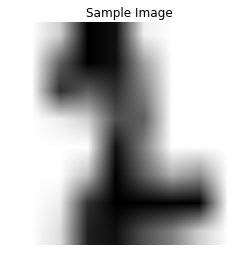

7 nearest neighbors are: [2 2 2 2 2 2 2]

KNN predicts: 2

Digit is: 2


In [23]:
i = np.random.randint(0,len(data_test)) # Choose a random index in the test data
clf.predict(data_test[i,:],output=True)
print('\nDigit is:',target_test[i])

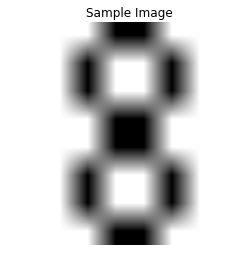

20 nearest neighbors are: [8 8 8 3 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]

KNN predicts: 8


8

In [24]:
v0 = [0,0,0,15,15,0,0,0]
v1 = [0,0,15,0,0,15,0,0]
v2 = [0,0,15,0,0,15,0,0]
v3 = [0,0,0,15,15,0,0,0]
v4 = [0,0,0,15,15,0,0,0]
v5 = [0,0,15,0,0,15,0,0]
v6 = [0,0,15,0,0,15,0,0]
v7 = [0,0,0,15,15,0,0,0]

clf.k = 20
image = np.array([v0,v1,v2,v3,v4,v5,v6,v7]).reshape(64,)
clf.predict(image,output=True)

### Evaluating the model

Recall that we split the dataset in two parts: a training set and a testing set. The idea is that we want to evaluate the accuracy of our model but **we can't test the model on the data we used to train the model** and so we use the testing set to evaluate the accuracy of the model.

In [25]:
clf = KNN(k=7)
clf.fit(data_train,target_train)

Creating KNN classifier object with k = 7 ...
Fitting the model with 1200 training samples ...


In [26]:
clf.score(data_test,target_test)

0.9631490787269682

In [27]:
for k in range(1,21):
    clf = KNN(k=k);
    clf.fit(data_train,target_train);
    print('For k =',k,' accuracy is',clf.score(data_test,target_test))

Creating KNN classifier object with k = 1 ...
Fitting the model with 1200 training samples ...
For k = 1  accuracy is 0.964824120603015
Creating KNN classifier object with k = 2 ...
Fitting the model with 1200 training samples ...
For k = 2  accuracy is 0.9681742043551089
Creating KNN classifier object with k = 3 ...
Fitting the model with 1200 training samples ...
For k = 3  accuracy is 0.9698492462311558
Creating KNN classifier object with k = 4 ...
Fitting the model with 1200 training samples ...
For k = 4  accuracy is 0.964824120603015
Creating KNN classifier object with k = 5 ...
Fitting the model with 1200 training samples ...
For k = 5  accuracy is 0.964824120603015
Creating KNN classifier object with k = 6 ...
Fitting the model with 1200 training samples ...
For k = 6  accuracy is 0.9614740368509213
Creating KNN classifier object with k = 7 ...
Fitting the model with 1200 training samples ...
For k = 7  accuracy is 0.9631490787269682
Creating KNN classifier object with k = 8 ..

It seems that `k = 3` produces the best results with 96.48% accuracy:

```
Creating KNN classifier object with k = 3 ...
Fitting the model with 1200 training samples ...
For k = 3  accuracy is 0.9698492462311558
```

Let's use k = 3 on some digits created manually:

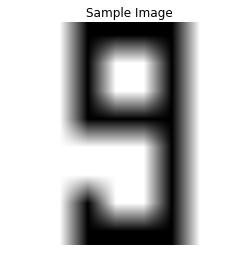

3 nearest neighbors are: [9 9 9]

KNN predicts: 9


9

In [28]:
v0 = [0,0,15,15,15,15,0,0]
v1 = [0,0,15,0,0,15,0,0]
v2 = [0,0,15,0,0,15,0,0]
v3 = [0,0,15,15,15,15,0,0]
v4 = [0,0,0,0,0,15,0,0]
v5 = [0,0,0,0,0,15,0,0]
v6 = [0,0,15,0,0,15,0,0]
v7 = [0,0,15,15,15,15,0,0]

clf.k = 3
image = np.array([v0,v1,v2,v3,v4,v5,v6,v7]).reshape(64,)
clf.predict(image,output=True)

### Implementing `sklearn.neighbors.KNeighborsClassifier`

See the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for a description of the *k*-nearest neighbors class and its attributes and methods.

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [30]:
clf = KNC(n_neighbors=3)

In [31]:
clf.fit(data_train,target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

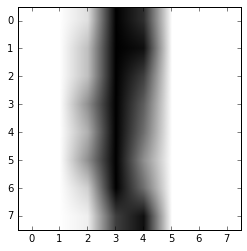

Classifier predicts: 1
Digit is: 1


In [32]:
i = np.random.randint(0,len(data_test)) # Choose a random index in the test data
plt.imshow(data_test[i].reshape(8,8),cmap='binary')
plt.show()
prediction = clf.predict(data_test[i].reshape(1,64)) # All sklearn models expect a 2D array input to the predict method
print('Classifier predicts:',prediction[0])
print('Digit is:',target_test[i])

In [33]:
clf.score(data_test,target_test)

0.96984924623115576